## K Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd

data = np.loadtxt('/Users/anthonymunoz/ISTDTerm6/MachineLearning/01.112 Machine Learning/HW2/HW2_data/1/hw2-image.txt')
#print(data)
#print(data.shape)

In [2]:
# def dist(p1,p2):
#     total = 0
#     for i in range(len(p1)):
#         total += np.square(p1[i] - p2[i])
#     return total
   
def dist(p1,p2):
    return np.sum((p1-p2)**2)

#print(dist(data[0],data[1]))

In [3]:

#print(centers)

#centroids_old = np.zeros(init_reshape.shape)
# print(centroids_old)
#print(init_reshape)

# def compute_index(data,centroids):
#     index = []
#     for i in range(len(data)):
#         init = []
#         for j in range(len(centroids)):
#             init.append(dist(centroids[j],data[i]))
#     return

#print(dist(init_reshape,centroids_old))

In [4]:
def nearest(cluster_array, point):
    nearest = 0 
    nearest_dist = 99999999
    for i in range(len(cluster_array)):
        distance = dist(cluster_array[i], point)
        if distance < nearest_dist:
            nearest = i
            nearest_dist = distance
    return nearest

In [5]:
#convert to integer array 
def convert(str):
    arr = str.split(" ")
    for i in range(len(arr)):
        arr[i] = int(arr[i])
    return arr

#recomputes new centre
def recompute(cluster):
    x = 0
    y = 0
    z = 0
    new_center = []
    # the number of vectors
    for i in range(len(cluster)):
        x += cluster[i][0]
        y += cluster[i][1]
        z += cluster[i][2]
    new_center.append(x/len(cluster))
    new_center.append(y/len(cluster))
    new_center.append(z/len(cluster))
    return new_center

def stop(cluster_count, new_cluster_count):
    for i in range(len(cluster_count)):
        if cluster_count[i] != new_cluster_count[i]:
            return False
    return True 



In [19]:
cluster_vector = [[],[],[],[],[],[],[],[]]
cluster_count = [0,0,0,0,0,0,0,0]
old_cluster_count = [-1,-1,-1,-1,-1,-1,-1,-1]
iterations = 0
sum_euclid_dist_arr = []

init_centroid = np.array([[255,255,255],[255,0,0],[128,0,0],[0,255,0],[0,128,0],[0,0,255],[0,0,128],[0,0,0]],dtype='float64')
centers = np.reshape(init_centroid,(-1,3))

def get_count(data):
    global sum_euclid_dist
    for i in range(len(data)):
        nearest_cluster = nearest(centers, data[i])
        cluster_vector[nearest_cluster].append(data[i])
        cluster_count[nearest_cluster] += 1
        sum_euclid_dist += dist(data[i], centers[nearest_cluster])
    sum_euclid_dist_arr.append(sum_euclid_dist)
    return cluster_count


sum_euclid_dist = 0 
cluster_count = get_count(data)
print("The sum of euclid dist is " + str(sum_euclid_dist))  
print(cluster_count)
while stop(cluster_count, old_cluster_count) == False:
    sum_euclid_dist = 0
    iterations += 1
    print("Gone through " + str(iterations) + " iterations")
    old_cluster_count = cluster_count
    cluster_count = [0,0,0,0,0,0,0,0]
    #recomputing new center
    for i in range(8):
        if (len(cluster_vector[i]) != 0):
            centers[i] = recompute(cluster_vector[i])
    #reassigning each cluster
    cluster_vector = [[],[],[],[],[],[],[],[]]
    cluster_count = get_count(data)
    print("New centers are:" + str(centers))
    print("New cluster_count is :" + str(cluster_count))
    print("The sum of euclid dist is " + str(sum_euclid_dist)) 




The sum of euclid dist is 1288503836.0
[7841, 8037, 109941, 0, 176, 0, 895, 83122]
Gone through 1 iterations
New centers are:[[226.2480551  208.85269736 194.33031501]
 [203.59562026 135.48836631  77.5030484 ]
 [127.34619478  64.4117936   21.9861835 ]
 [  0.         255.           0.        ]
 [ 92.93181818  94.45454545  89.30113636]
 [  0.           0.         255.        ]
 [ 56.16536313  56.91284916  79.27039106]
 [ 29.20886167  23.7493684   22.21048579]]
New cluster_count is :[5491, 21678, 82000, 0, 3863, 0, 2617, 94363]
The sum of euclid dist is 210294736.576248
Gone through 2 iterations
New centers are:[[235.90366054 231.99927154 226.03988345]
 [189.74227327 125.89648492  74.8227235 ]
 [129.9375122   61.3082561   14.90686585]
 [  0.         255.           0.        ]
 [114.89179394 102.59228579  93.03986539]
 [  0.           0.         255.        ]
 [ 55.73290027  50.30683989  57.78945357]
 [ 34.46545786  24.28230345  20.13988534]]
New cluster_count is :[5146, 24885, 75016, 0, 46

New centers are:[[239.57126123 236.4957048  231.25185474]
 [187.47837413 123.31082534  72.67908535]
 [140.16843674  65.22224917  13.57570297]
 [  0.         255.           0.        ]
 [119.62714509  99.65903969  85.79701855]
 [  0.           0.         255.        ]
 [ 81.99671864  37.68375604  11.91794138]
 [ 26.60638187  23.33298125  23.38005633]]
New cluster_count is :[5122, 24129, 57660, 0, 5891, 0, 40524, 76686]
The sum of euclid dist is 129444160.52453339
Gone through 19 iterations
New centers are:[[239.57126123 236.4957048  231.25185474]
 [187.53466783 123.44253802  72.84756931]
 [140.19184877  65.21044051  13.53204995]
 [  0.         255.           0.        ]
 [119.9266678   99.07027669  84.67883212]
 [  0.           0.         255.        ]
 [ 82.00091304  37.6774504   11.9047478 ]
 [ 26.60638187  23.33298125  23.38005633]]
New cluster_count is :[5122, 24097, 57531, 0, 6071, 0, 40507, 76684]
The sum of euclid dist is 129416973.77892445
Gone through 20 iterations
New centers 

New centers are:[[241.17622038 238.54810614 233.77111606]
 [194.30728079 136.15540188  90.61932411]
 [136.29508165  61.07102793  10.04969857]
 [  0.         255.           0.        ]
 [157.01303775  97.36932722  51.33934493]
 [  0.           0.         255.        ]
 [ 79.09910897  37.18166658  13.06839564]
 [ 26.05743945  23.24474315  23.57681661]]
New cluster_count is :[4934, 15317, 52446, 0, 22007, 0, 40306, 75002]
The sum of euclid dist is 117889008.22671239
Gone through 36 iterations
New centers are:[[241.18929874 238.5804621  233.81414674]
 [194.32499837 136.18228113  90.65613371]
 [136.28398734  61.07607825  10.06660184]
 [  0.         255.           0.        ]
 [157.06025356  97.39982733  51.3538874 ]
 [  0.           0.         255.        ]
 [ 79.00124051  37.13404952  13.05604625]
 [ 26.00859977  23.2424202   23.60082398]]
New cluster_count is :[4933, 15306, 52492, 0, 21991, 0, 40367, 74923]
The sum of euclid dist is 117887541.06351668
Gone through 37 iterations
New center

## 1a, 1b and 1c

In [30]:

#print("The final centroids are " + str(centers))

total_clusters = 0
for cluster in range(len(cluster_count)):
    if cluster_count[cluster] != 0:
        total_clusters +=1
        print('Cluster: ' + str(total_clusters))
        print(cluster_count[cluster])
        print(centers[cluster])
        print('\n')

print('Total number of clusters: ' + str(total_clusters))
    


Cluster: 1
4930
[241.2296146  238.62515213 233.86288032]


Cluster: 2
15190
[194.41158657 136.33311389  90.94364714]


Cluster: 3
52535
[136.2655563   61.08973066  10.10385457]


Cluster: 4
22075
[157.29173273  97.59397508  51.43329558]


Cluster: 5
40365
[78.92743714 37.10828688 13.07070482]


Cluster: 6
74917
[25.97800232 23.23575423 23.60599063]


Total number of clusters: 6


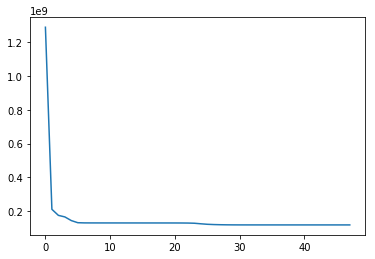

In [21]:
num_iterations = []
for i in range(0,48):
    num_iterations.append(i)
plt.plot(num_iterations, sum_euclid_dist_arr)
plt.show()

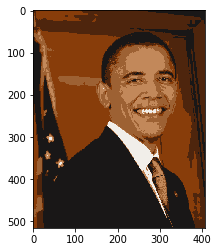

In [31]:
new_image = [[] for i in range(516*407)]
for pixel in range(len(data)):
    nearest_index = nearest(centers,data[pixel])
    new_image[pixel] = centers[nearest_index]
    
image = np.array(new_image).reshape(516,407,3)
image = image.astype(np.uint8)

plt.imshow(image)
plt.show()